In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import collections
from collections import Counter
import ast
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
df1=pd.read_csv("titles.csv")

In [4]:
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [5]:
df2=pd.read_csv("credits.csv")

In [6]:
df2.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [7]:
merged=pd.merge(df1,df2,on="id",how="outer")

In [8]:
merged.to_csv("Credit_title.csv",index=False)

In [9]:
merged.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


In [10]:
print(merged)

               id              title   type  \
0         ts20945  The Three Stooges   SHOW   
1         ts20945  The Three Stooges   SHOW   
2         ts20945  The Three Stooges   SHOW   
3         tm19248        The General  MOVIE   
4         tm19248        The General  MOVIE   
...           ...                ...    ...   
125349  tm1054116           Baikunth  MOVIE   
125350  tm1054116           Baikunth  MOVIE   
125351  tm1054116           Baikunth  MOVIE   
125352  tm1054116           Baikunth  MOVIE   
125353   ts275838   Waking Up Eighty   SHOW   

                                              description  release_year  \
0       The Three Stooges were an American vaudeville ...          1934   
1       The Three Stooges were an American vaudeville ...          1934   
2       The Three Stooges were an American vaudeville ...          1934   
3       During America’s Civil War, Union spies steal ...          1926   
4       During America’s Civil War, Union spies steal ...   

In [11]:
merged.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,125354.000000,125354.00000,8501.000000,118987.000000,1.189570e+05,124800.000000,114263.000000,1.243470e+05
mean,1996.374715,95.30792,2.335372,5.970856,2.311206e+04,10.134483,5.993077,4.062528e+05
std,27.758800,30.39349,3.164860,1.243967,8.816389e+04,40.666765,1.322900,5.614483e+05
min,1912.000000,1.00000,1.000000,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00
25%,1983.000000,82.00000,1.000000,5.200000,2.790000e+02,1.858000,5.300000,3.899600e+04
50%,2009.000000,93.00000,1.000000,6.100000,1.227000e+03,3.864000,6.100000,1.339340e+05
75%,2017.000000,109.00000,2.000000,6.800000,7.039000e+03,8.787000,6.800000,5.711600e+05
max,2022.000000,549.00000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


In [12]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

In [13]:
duplicate=merged.duplicated().sum()
print(f"total duplicate : {duplicate}")

total duplicate : 168


In [14]:
merged.drop_duplicates(inplace=True)

In [15]:
merged.isnull().sum()

id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68329
runtime                      0
genres                       0
production_countries         0
seasons                 116685
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popularity            554
tmdb_score               10995
person_id                 1007
name                      1007
character                17284
role                      1007
dtype: int64

In [16]:
merged["character"].fillna("Unknown",inplace=True)

In [17]:
merged["role"].fillna("Unknown",inplace=True)

In [18]:
merged["production_countries"].fillna("Unknown",inplace=True)

In [19]:
merged.fillna(0,inplace=True)

In [20]:
merged[["id","title","type","description","age_certification","genres","imdb_id","name"]].replace(0,np.nan)

,id,title,type,description,age_certification,genres,imdb_id,name
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,TV-PG,"['comedy', 'family', 'animation', 'action', 'f...",tt0850645,Joe Besser
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,TV-PG,"['comedy', 'family', 'animation', 'action', 'f...",tt0850645,Moe Howard
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,TV-PG,"['comedy', 'family', 'animation', 'action', 'f...",tt0850645,Larry Fine
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",NaN,"['action', 'drama', 'war', 'western', 'comedy'...",tt0017925,Buster Keaton
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",NaN,"['action', 'drama', 'war', 'western', 'comedy'...",tt0017925,Marion Mack
...,...,...,...,...,...,...,...,...
125349,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",NaN,"['family', 'drama']",tt14331982,Vijay Thakur
125350,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",NaN,"['family', 'drama']",tt14331982,Vanya Wellens
125351,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",NaN,"['family', 'drama']",tt14331982,Vishwa Bhanu
125352,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",NaN,"['family', 'drama']",tt14331982,Vishwa Bhanu


In [21]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125186 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125186 non-null  object 
 1   title                 125186 non-null  object 
 2   type                  125186 non-null  object 
 3   description           125186 non-null  object 
 4   release_year          125186 non-null  int64  
 5   age_certification     125186 non-null  object 
 6   runtime               125186 non-null  int64  
 7   genres                125186 non-null  object 
 8   production_countries  125186 non-null  object 
 9   seasons               125186 non-null  float64
 10  imdb_id               125186 non-null  object 
 11  imdb_score            125186 non-null  float64
 12  imdb_votes            125186 non-null  float64
 13  tmdb_popularity       125186 non-null  float64
 14  tmdb_score            125186 non-null  float64
 15  perso

In [22]:
merged.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64

In [23]:
merged.to_csv("Clean_Credit_title_dataset.csv",index=False)

In [24]:
for col in merged.columns:
    print(f"{col} = {merged[col].nunique()} unique values")

id = 9868 unique values
title = 9737 unique values
type = 2 unique values
description = 9735 unique values
release_year = 110 unique values
age_certification = 12 unique values
runtime = 207 unique values
genres = 2028 unique values
production_countries = 497 unique values
seasons = 33 unique values
imdb_id = 9202 unique values
imdb_score = 87 unique values
imdb_votes = 3651 unique values
tmdb_popularity = 5326 unique values
tmdb_score = 90 unique values
person_id = 80509 unique values
name = 79759 unique values
character = 71098 unique values
role = 3 unique values


Text(0, 0.5, 'Count')

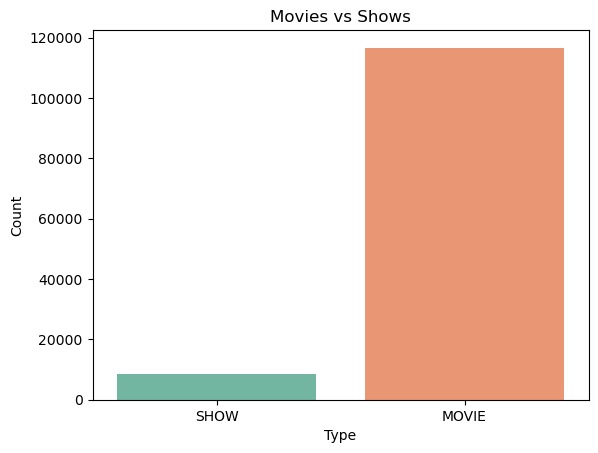

In [25]:
sns.countplot(data=merged,x="type",palette="Set2")
plt.title("Movies vs Shows")
plt.xlabel("Type")
plt.ylabel("Count")

In [26]:
print(merged.columns)
merged.columns.str.strip()
merged["genres"].head()
genres = merged['genres'].dropna().str.split(',')
flat_genres = [item for sublist in genres for item in sublist]
genre_count = Counter(flat_genres)
genre_df = pd.DataFrame(genre_count.items(), columns=["Genre", "Count"])
genre_df.sort_values(by="Count", ascending=False).head(10)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')


,Genre,Count
17,['drama',26939
13,'drama'],16768
7,'drama',16297
15,['thriller',15185
3,'action',13573
0,['comedy',13383
14,'romance'],12242
10,'comedy',11933
19,'comedy'],10497
11,'european'],10217


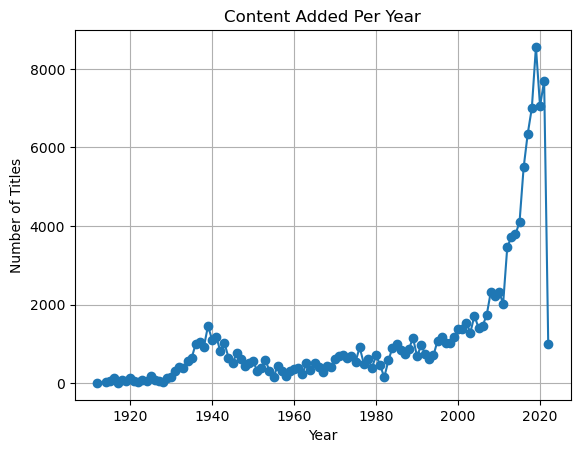

In [27]:
merged['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

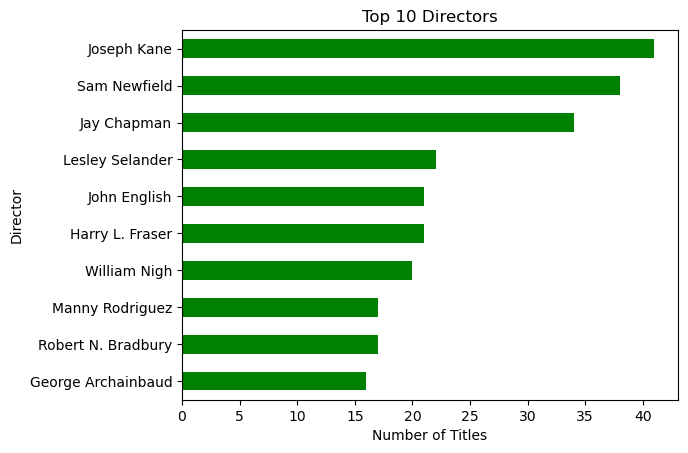

In [28]:
merged['role'] = merged['role'].astype(str).str.lower().str.strip()
director_counts = merged[merged["role"] == "director"]["name"].value_counts().head(10)
if not director_counts.empty:
    director_counts.plot(kind='barh', color='green')
    plt.title("Top 10 Directors")
    plt.xlabel("Number of Titles")
    plt.ylabel("Director")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No director data found.")

25     Clyde Bruckman
26      Buster Keaton
57      William Wyler
93       Howard Hawks
113      Nicholas Ray
Name: name, dtype: object


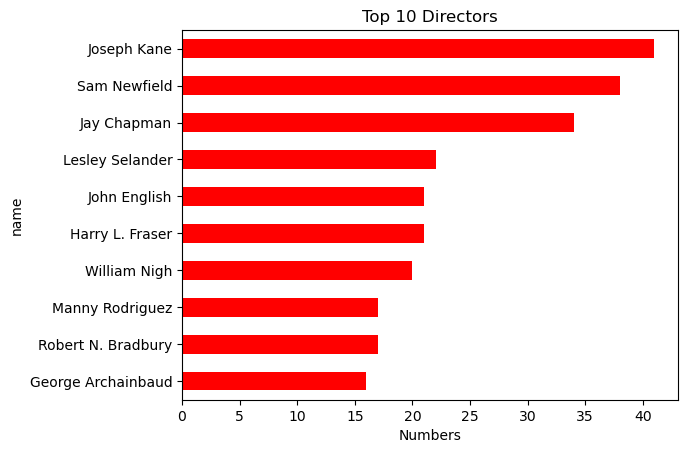

In [29]:
merged["role"] = merged["role"].str.strip().str.lower()
director = merged[merged["role"] == "director"]["name"]
director.value_counts().head(10).plot(kind='barh', color='red')
print(director.head())
plt.title("Top 10 Directors")
plt.xlabel("Numbers")
plt.gca().invert_yaxis()
plt.show()

In [30]:
actor = merged[merged["role"] == "actor"]["name"].value_counts().head(10)

0       Joe Besser
1       Moe Howard
2       Larry Fine
3    Buster Keaton
4      Marion Mack
Name: name, dtype: object


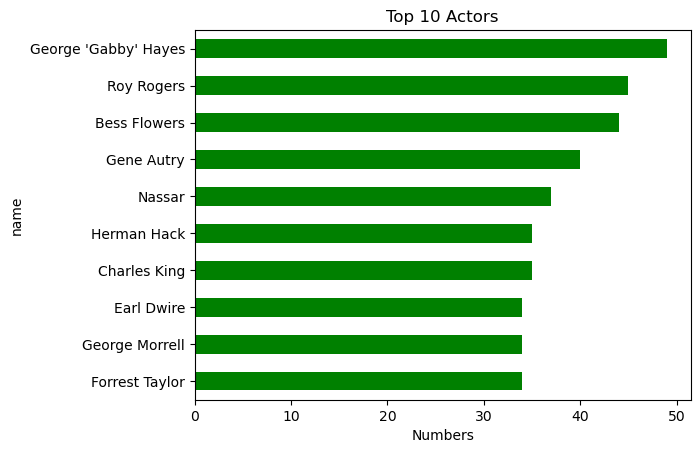

In [31]:
merged["role"] = merged["role"].str.strip().str.lower()
actor = merged[merged["role"] == "actor"]["name"]
actor.value_counts().head(10).plot(kind='barh', color='green')
print(actor.head())
plt.title("Top 10 Actors")
plt.xlabel("Numbers")
plt.gca().invert_yaxis()
plt.show()

In [32]:
genre = merged[merged["genres"] == "genres"]["name"].value_counts().head(10)

Series([], Name: name, dtype: object)


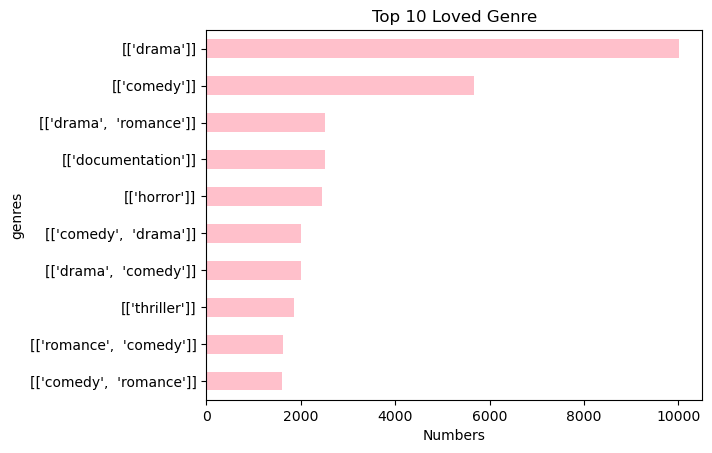

In [33]:
merged["genre"] = merged["genres"].str.strip().str.lower()
genre = merged[merged["genres"] == "genres"]["name"]
genres.value_counts().head(10).plot(kind='barh', color='pink')
print(genre.head())
plt.title("Top 10 Loved Genre")
plt.xlabel("Numbers")
plt.gca().invert_yaxis()
plt.show()

In [34]:
types = merged[merged["type"] == "type"]["name"].value_counts().head(10)

Series([], Name: name, dtype: object)


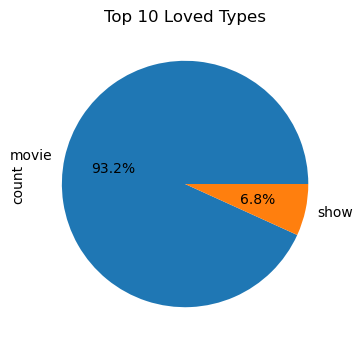

In [35]:
merged["types"] = merged["type"].str.strip().str.lower()
types = merged[merged["type"] == "type"]["name"]
type_series = merged["types"].value_counts().head(10)
type_series.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))
print(types.head())
plt.title("Top 10 Loved Types")
plt.show()

In [36]:
def extract_all_countries(val):
    try:
        if pd.isna(val):
            return []
        parsed = ast.literal_eval(val)  # Safely parse string to list
        if isinstance(parsed, list):
            return [str(code).strip() for code in parsed if isinstance(code, str)]
    except (ValueError, SyntaxError):
        pass
    return []
merged['clean_production_countries'] = merged['production_countries'].apply(extract_all_countries)
all_countries = merged['clean_production_countries'].explode()
top_10_production_countries = all_countries.dropna().value_counts().head(10)
print(top_10_production_countries)
merged.to_csv("Cleaned_credit_title_data.csv", index=False)

clean_production_countries
US    79111
GB    12574
IN    11591
CA     6625
FR     4861
DE     3219
JP     2650
IT     2578
AU     2195
CN     1898
Name: count, dtype: int64


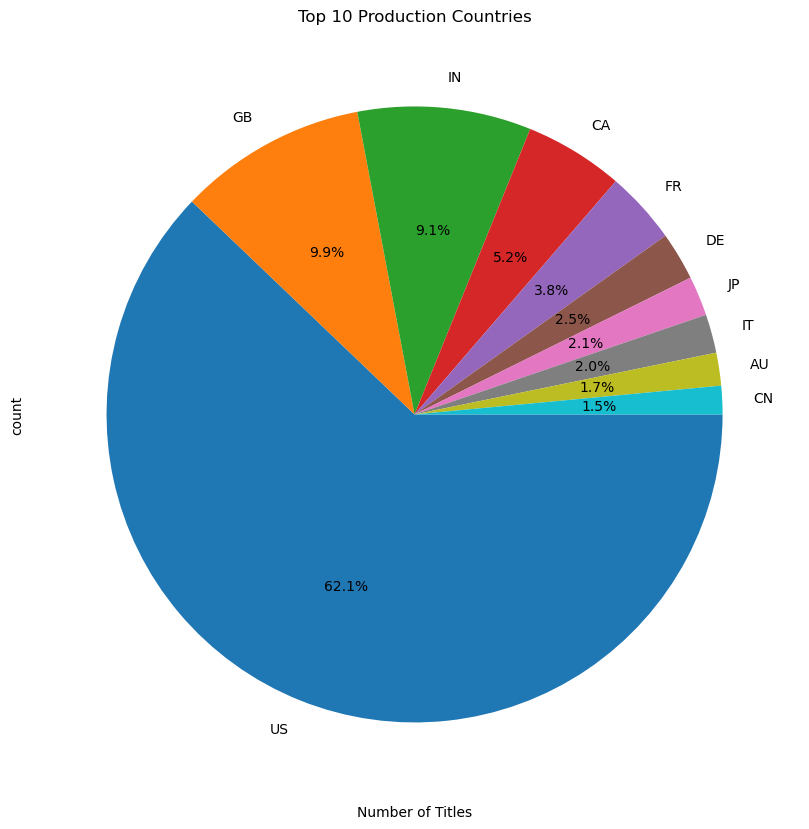

In [37]:
top_10_production_countries.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.xlabel("Number of Titles")
plt.title("Top 10 Production Countries")
plt.gca().invert_yaxis()
plt.show()

In [38]:
def score_to_sentiment(score):
    if score >= 8:
        return 'Positive'
    elif score >= 6:
        return 'Neutral'
    else:
        return 'Negative'
merged['sentiment'] = merged['imdb_score'].apply(score_to_sentiment)

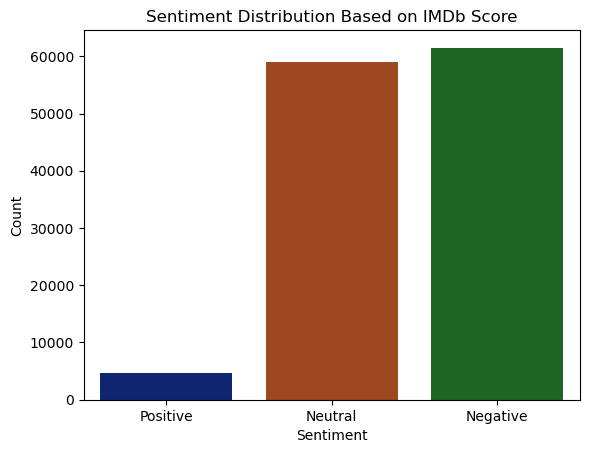

In [39]:
sns.countplot(x='sentiment', data=merged, palette='dark')
plt.title('Sentiment Distribution Based on IMDb Score')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [40]:
def score_to_sentiment(score):
    if score >= 8:
        return 'Positive'
    elif score >= 6:
        return 'Neutral'
    else:
        return 'Negative'
merged['sentiment'] = merged['tmdb_score'].apply(score_to_sentiment)

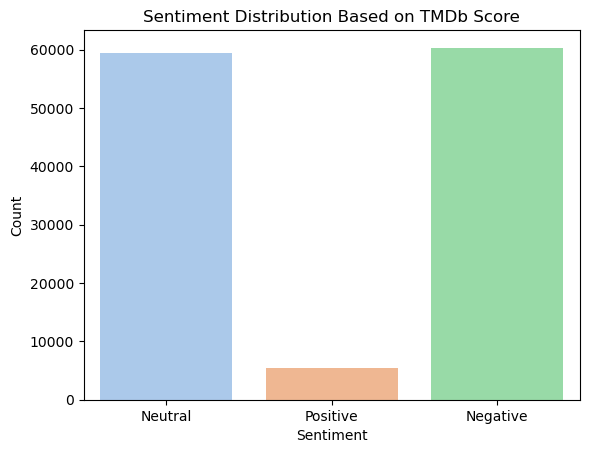

In [41]:
sns.countplot(x='sentiment', data=merged, palette='pastel')
plt.title('Sentiment Distribution Based on TMDb Score')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

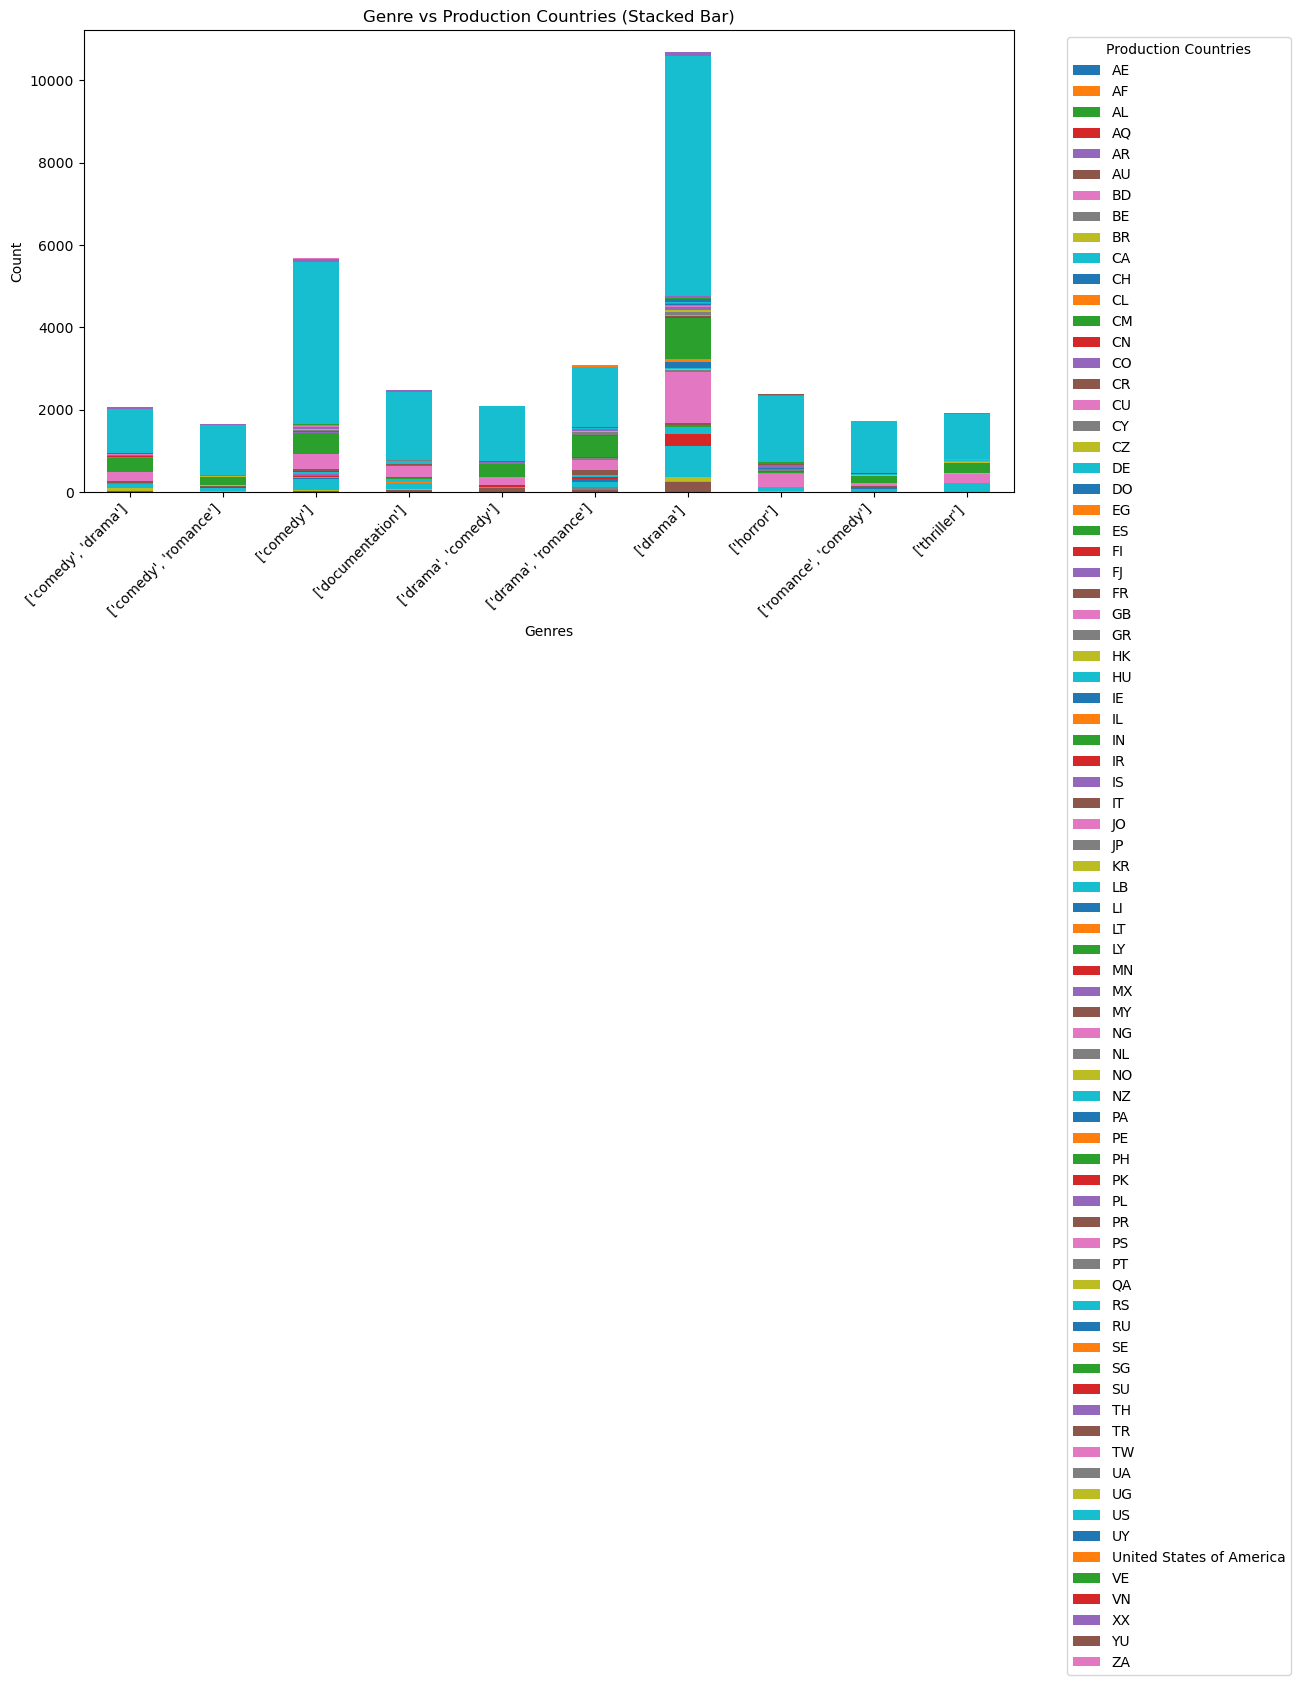

In [42]:
merged_clean = merged.explode('genres').explode('clean_production_countries')
top_genres = merged['genres'].value_counts().nlargest(10).index
filtered = merged_clean[merged_clean['genres'].isin(top_genres)]
pd.crosstab(filtered['genres'],filtered ['clean_production_countries']).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Genre vs Production Countries (Stacked Bar)")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Production Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [43]:
high_rated = merged_clean[merged_clean['imdb_score'] >= 8].copy()
high_rated = high_rated.dropna(subset=['genres'])
def parse_genres(g):
    try:
        result = ast.literal_eval(g)
        if isinstance(result, list):
            return [x.strip() for x in result]
    except:
        return [x.strip() for x in g.split(',')]
    return []
high_rated['genre_list'] = high_rated['genres'].apply(parse_genres)
exploded_high = high_rated.explode('genre_list')
if not exploded_high['genre_list'].empty:
    most_common_high = exploded_high['genre_list'].mode().iloc[0]
    print(f"- Most common genres among high-rated titles (IMDb ≥ 8): {most_common_high}")
else:
    print("- No genres found among high-rated titles.")
strength_titles = high_rated[['title', 'imdb_score']]

- Most common genres among high-rated titles (IMDb ≥ 8): drama


In [44]:
low_rated = merged_clean[merged_clean['imdb_score'] < 4].copy()
low_rated = low_rated.dropna(subset=['genres'])
def parse_genres(g):
    if isinstance(g, str):
        try:
            # Try to parse if it's a list string
            parsed = ast.literal_eval(g)
            if isinstance(parsed, list):
                return [item.strip() for item in parsed]
        except:
            return [x.strip() for x in g.split(',')]
    return []

low_rated['genre_list'] = low_rated['genres'].apply(parse_genres)
exploded_low = low_rated.explode('genre_list')
if not exploded_low['genre_list'].empty:
    most_common_low = exploded_low['genre_list'].mode().iloc[0]
    print(f"- Most common genres among low-rated titles (IMDb < 4): {most_common_low}")
else:
    print("- No genres found among low-rated titles.")
weakness_titles = low_rated[['title', 'imdb_score']]

- Most common genres among low-rated titles (IMDb < 4): thriller



Top 10 trending genres since 2015:
genres
['drama']                 4679
['comedy']                2586
['documentation']         1328
['horror']                1224
['comedy', 'drama']       1149
['thriller']              1126
['drama', 'comedy']       1060
['drama', 'romance']       778
['thriller', 'drama']      701
['horror', 'thriller']     636
Name: count, dtype: int64


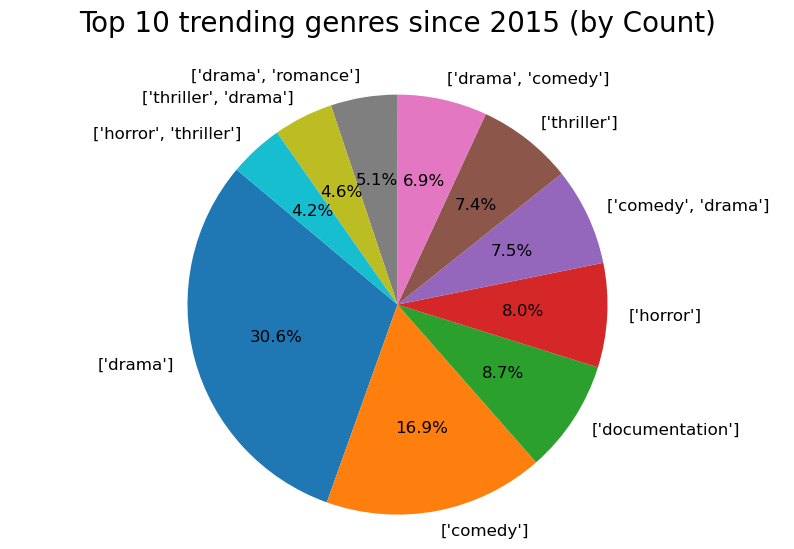

In [45]:
merged_clean['release_year'] = pd.to_numeric(merged_clean['release_year'],errors='coerce')
merged_clean = merged.dropna(subset=['release_year']).copy()
merged_clean['release_year'] = merged_clean['release_year'].astype(int)
recent_trending = merged_clean[merged_clean['release_year'] >= 2015]
top_recent_genres = recent_trending['genres'].value_counts().head(10)
print("\nTop 10 trending genres since 2015:")
print(top_recent_genres)
plt.figure(figsize=(10, 6))
plt.pie(
    top_recent_genres.values,
    labels=top_recent_genres.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("Top 10 trending genres since 2015 (by Count)",fontsize=20,pad=30)
plt.axis('equal')
plt.show()

In [46]:
top_genres = merged_clean['genres'].value_counts()
saturated_genres = top_genres[top_genres > top_genres.mean()].index.tolist()
print("\nSaturated genres (more than average frequency):")
print(saturated_genres)


Saturated genres (more than average frequency):
["['drama']", "['comedy']", "['drama', 'romance']", "['documentation']", "['horror']", "['comedy', 'drama']", "['drama', 'comedy']", "['thriller']", "['romance', 'comedy']", "['comedy', 'romance']", "['thriller', 'drama']", "['thriller', 'crime', 'drama']", "['western']", "['romance', 'drama']", "['horror', 'thriller']", "['comedy', 'drama', 'romance']", "['drama', 'crime']", "['drama', 'comedy', 'romance']", "['thriller', 'horror']", "['drama', 'european']", "['action']", "['drama', 'thriller']", "['drama', 'action']", "['drama', 'history']", "['crime', 'drama']", "['romance', 'comedy', 'drama']", "['thriller', 'action', 'crime']", "['western', 'action']", "['thriller', 'action']", "['comedy', 'european']", "['drama', 'romance', 'comedy']", "['drama', 'family']", "['thriller', 'crime']", "['thriller', 'action', 'crime', 'drama']", '[]', "['action', 'drama']", "['drama', 'comedy', 'european']", "['drama', 'war']", "['thriller', 'action',

In [47]:
def classify_swot(row, saturated_genres):
    score = row['imdb_score']
    year = row['release_year']
    genres = row['genres']
    sentiment = row.get('sentiment', '')

    # Strength
    if score >= 8 and year >= 2015:
        return 'Strength'

    # Weakness
    elif score < 4.0:
        return 'Weakness'

    # Opportunity
    elif (score >= 6 and score < 7.5) and year >= 2020:
        return 'Opportunity'

    # Threat
    elif any(g.strip() in saturated_genres for g in str(genres).split(',')):
        return 'Threat'

    return 'Neutral'
merged_clean['swot_category'] = merged_clean.apply(lambda row: classify_swot(row, saturated_genres), axis=1)
merged_clean[['title', 'imdb_score', 'release_year','genres', 'swot_category']].sort_values(by='release_year', ascending=False).head(20)


,title,imdb_score,release_year,genres,swot_category
123086,Haterz,7.2,2022,"['action', 'comedy', 'drama']",Opportunity
121809,Aaraattu,5.9,2022,"['action', 'drama']",Neutral
121826,Aaraattu,5.9,2022,"['action', 'drama']",Neutral
121827,Aaraattu,5.9,2022,"['action', 'drama']",Neutral
117261,Master,4.9,2022,"['thriller', 'horror', 'drama']",Neutral
117260,Master,4.9,2022,"['thriller', 'horror', 'drama']",Neutral
117243,Master,4.9,2022,"['thriller', 'horror', 'drama']",Neutral
117242,Master,4.9,2022,"['thriller', 'horror', 'drama']",Neutral
120083,Galwakdi,7.8,2022,"['drama', 'comedy', 'romance']",Neutral
120082,Galwakdi,7.8,2022,"['drama', 'comedy', 'romance']",Neutral


In [48]:
swot = {
    "Strengths": ["High IMDb scores", "Popular genres like Drama and Action"],
    "Weaknesses": ["Low diversity in genres", "Fewer recent releases"],
    "Opportunities": ["Growing audience for Sci-Fi", "High ratings in new content"],
    "Threats": ["Saturated genres like Comedy", "Low-rated sequels"]
}
swot_matrix = [  
    [", ".join(swot["Strengths"]), ", ".join(swot["Weaknesses"])],  
    [", ".join(swot["Opportunities"]), ", ".join(swot["Threats"])]  
]  
headers = ["Strengths", "Weaknesses"]  
print(" Amazon Prime SWOT Analysis")  
print(tabulate(swot_matrix, headers=headers, tablefmt="fancy_grid"))

swot_counts = {category: len(points) for category, points in swot.items()}

 Amazon Prime SWOT Analysis
╒══════════════════════════════════════════════════════════╤═════════════════════════════════════════════════╕
│ Strengths                                                │ Weaknesses                                      │
╞══════════════════════════════════════════════════════════╪═════════════════════════════════════════════════╡
│ High IMDb scores, Popular genres like Drama and Action   │ Low diversity in genres, Fewer recent releases  │
├──────────────────────────────────────────────────────────┼─────────────────────────────────────────────────┤
│ Growing audience for Sci-Fi, High ratings in new content │ Saturated genres like Comedy, Low-rated sequels │
╘══════════════════════════════════════════════════════════╧═════════════════════════════════════════════════╛


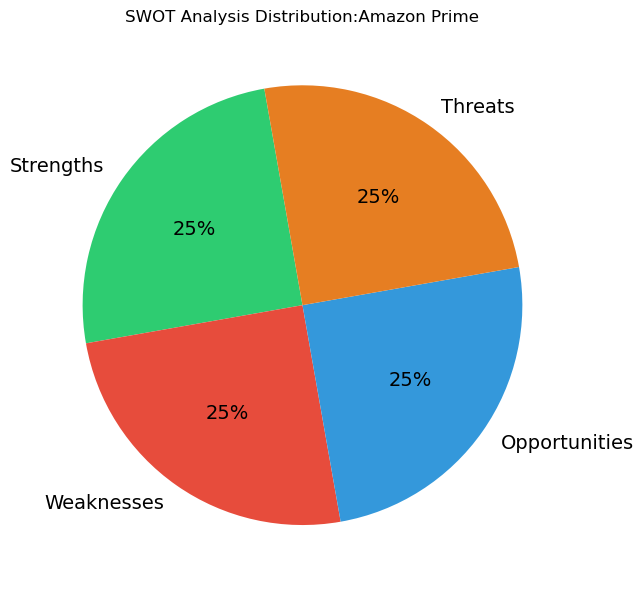

In [49]:
plt.figure(figsize=(10, 6))

plt.pie(
    swot_counts.values(),
    labels=swot_counts.keys(),
    autopct='%1.f%%',
    startangle=100,
    colors=["#2ecc71", "#e74c3c", "#3498db", "#e67e22"],
    textprops={'fontsize': 14}
)

plt.title("SWOT Analysis Distribution:Amazon Prime")
plt.tight_layout()
plt.show()


<Axes: xlabel='imdb_score', ylabel='tmdb_popularity'>

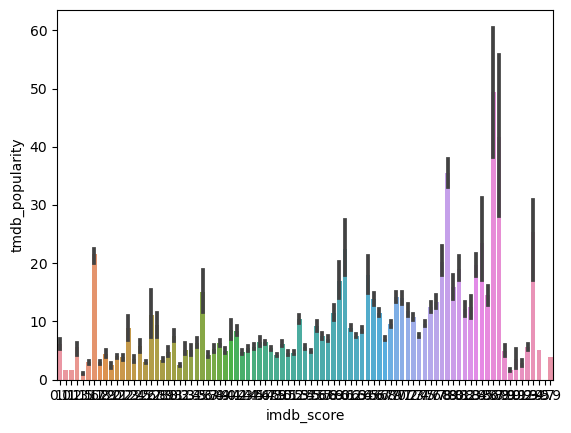

In [50]:
sns.barplot(data=merged, x='imdb_score', y='tmdb_popularity')

<Axes: xlabel='age_certification'>

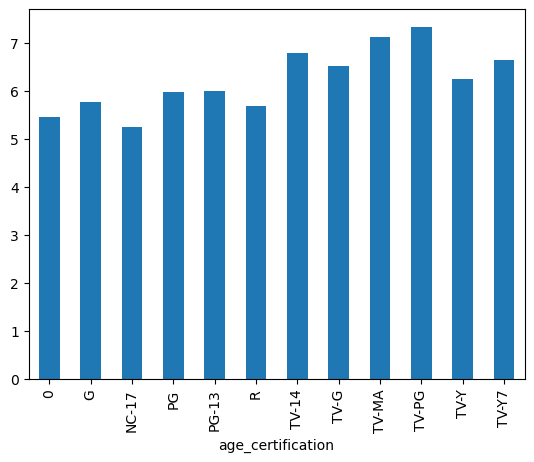

In [51]:
merged.groupby('age_certification')['imdb_score'].mean().plot(kind='bar')

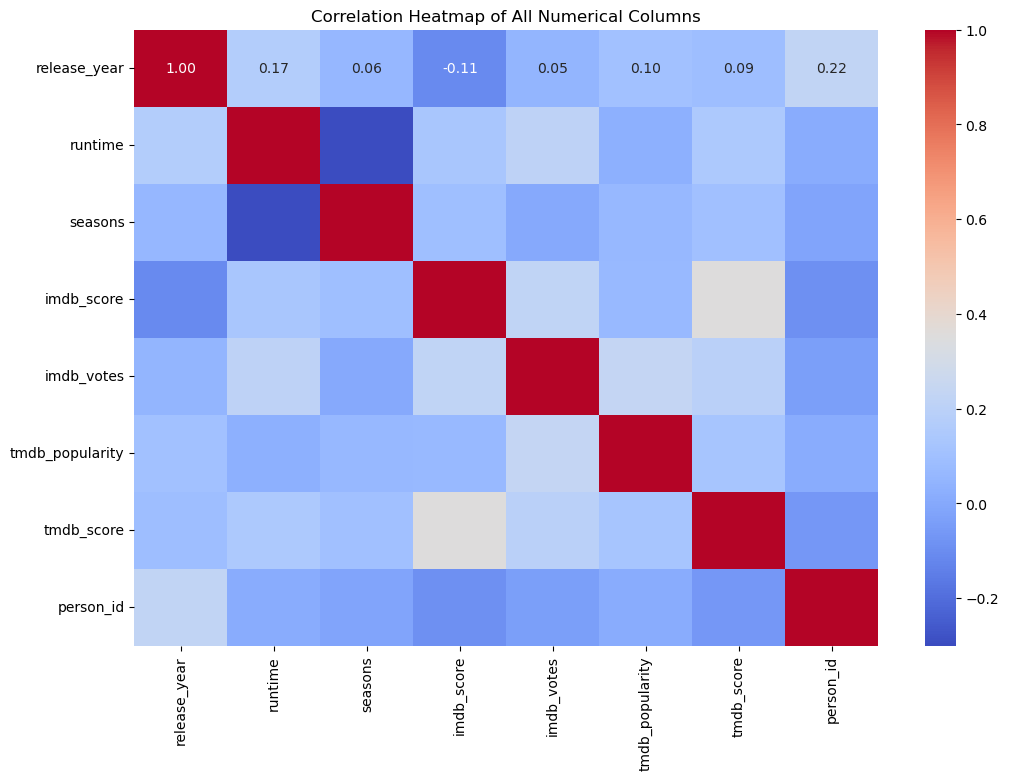

In [52]:
corr = merged.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Numerical Columns')
plt.show()

In [53]:
ML_IMDB_SCORE = merged.dropna(subset=['imdb_score', 'genres', 'release_year'])
def get_main_genre(x):
    try:
        genres = ast.literal_eval(x)
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0].strip().lower()
    except:
        return np.nan
ML_IMDB_SCORE['main_genre'] = ML_IMDB_SCORE['genres'].apply(get_main_genre)
print(ML_IMDB_SCORE['main_genre'].head(10))
print(ML_IMDB_SCORE['main_genre'].apply(type).unique())

0    comedy
1    comedy
2    comedy
3    action
4    action
5    action
6    action
7    action
8    action
9    action
Name: main_genre, dtype: object
[<class 'str'> <class 'NoneType'>]


In [54]:
ML_IMDB_SCORE_encoded = pd.get_dummies(ML_IMDB_SCORE[['release_year', 'main_genre']], columns=['main_genre'], prefix='genre')
ML_IMDB_SCORE_encoded['imdb_score'] = ML_IMDB_SCORE['imdb_score']
ML_IMDB_SCORE_encoded = ML_IMDB_SCORE_encoded.astype(int)
print(ML_IMDB_SCORE_encoded.columns.tolist())
print(ML_IMDB_SCORE_encoded.head())

['release_year', 'genre_action', 'genre_animation', 'genre_comedy', 'genre_crime', 'genre_documentation', 'genre_drama', 'genre_european', 'genre_family', 'genre_fantasy', 'genre_history', 'genre_horror', 'genre_music', 'genre_reality', 'genre_romance', 'genre_scifi', 'genre_sport', 'genre_thriller', 'genre_war', 'genre_western', 'imdb_score']
   release_year  genre_action  genre_animation  genre_comedy  genre_crime  \
0          1934             0                0             1            0   
1          1934             0                0             1            0   
2          1934             0                0             1            0   
3          1926             1                0             0            0   
4          1926             1                0             0            0   

   genre_documentation  genre_drama  genre_european  genre_family  \
0                    0            0               0             0   
1                    0            0               0  

In [55]:
X = ML_IMDB_SCORE_encoded.drop('imdb_score', axis=1)
y = ML_IMDB_SCORE_encoded['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.09086623240275016
MSE: 2.7466211265783658


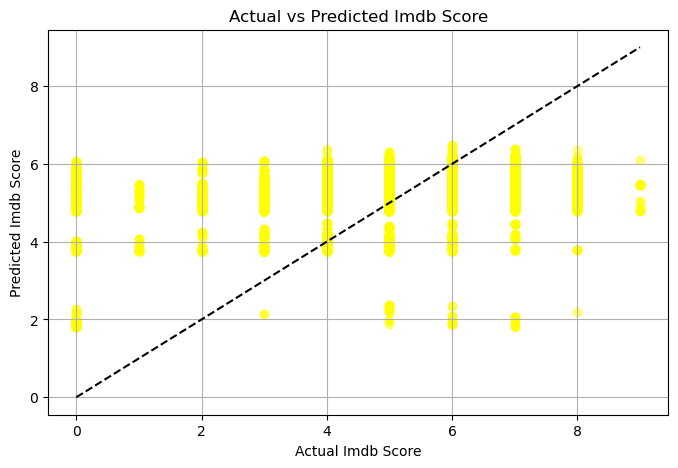

In [58]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='yellow')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.xlabel("Actual Imdb Score")
plt.ylabel("Predicted Imdb Score")
plt.title("Actual vs Predicted Imdb Score")
plt.grid(True)
plt.show()

In [59]:
ML_IMDB_SCORE_test = X_test.reset_index(drop=True)
ML_IMDB_SCORE_test['Actual_Imdb_Score'] = y_test.reset_index(drop=True)
ML_IMDB_SCORE_test['Predicted_Imdb_Score'] = y_pred
ML_IMDB_SCORE_test.to_csv("Imdb_Score_predictions_for_tableau.csv", index=False)

In [61]:
rf_imdb_score_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_imdb_score_model.fit(X_train, y_train)
rf_imdb_score_pred = rf_imdb_score_model.predict(X_test)
print("Random Forest R²:", r2_score(y_test, rf_imdb_score_pred))

Random Forest R²: 0.24524739709332832


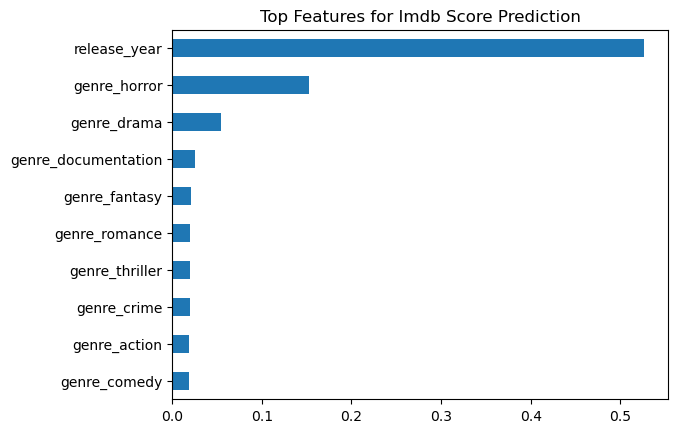

In [62]:
feat_imp_imdb_score = pd.Series(rf_imdb_score_model.feature_importances_, index=X.columns)
feat_imp_imdb_score.sort_values().tail(10).plot(kind='barh')
plt.title("Top Features for Imdb Score Prediction")
plt.show()